In [1]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import RobustScaler
import matplotlib.patches as mpatches
import time
from sklearn.externals import joblib

# Classifier Libraries

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
from sklearn.pipeline import make_pipeline
#from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import NearMiss
#from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

KeyboardInterrupt: 

In [ ]:
df = pd.read_csv('C:\workdir\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
scaler = RobustScaler()

df['amount_scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['time_scaled'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,amount_scaled,time_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [ ]:

from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('Length of X (train): {} | Length of y (train): {}'.format(len(X_train), len(y_train)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(X_test), len(y_test)))
print(Counter(y_train))
print(Counter(y_test))

Length of X (train): 227845 | Length of y (train): 227845
Length of X (test): 56962 | Length of y (test): 56962
Counter({0: 227449, 1: 396})
Counter({0: 56866, 1: 96})


Counter({0: 227449, 1: 227449})
Counter({0: 56866, 1: 56866})


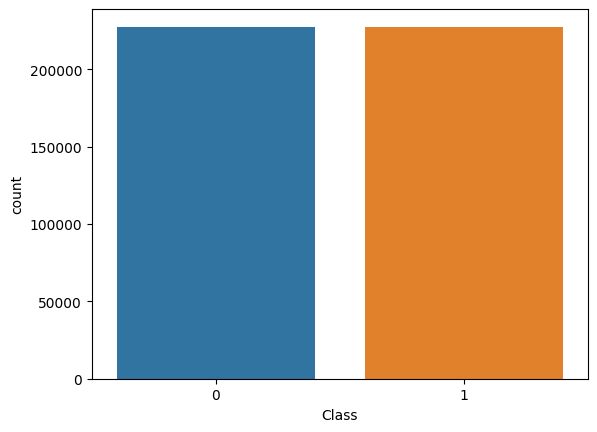

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state=42)

Xsm_train, ysm_train = sm.fit_resample(X_train, y_train)
Xsm_test, ysm_test = sm.fit_resample(X_test,y_test)
print(Counter(ysm_train))
print(Counter(ysm_test))
sns.countplot(x=ysm_train)
plt.show()

Ezzel meg is kaptuk a SMOTE által oversampled tanító adathalmazunkat. Láthatjuk, hogy a célváltozó mindkét értékéből egyenlő számú adatsort sikerült létrehoznunk, ezáltal ismét egy tökéletesen kiegyensúlyozott tanító adatbázist kaptunk.

Nézzük meg, hogy az előző példához képest, hogyan változtak a változók közötti korrelációk?

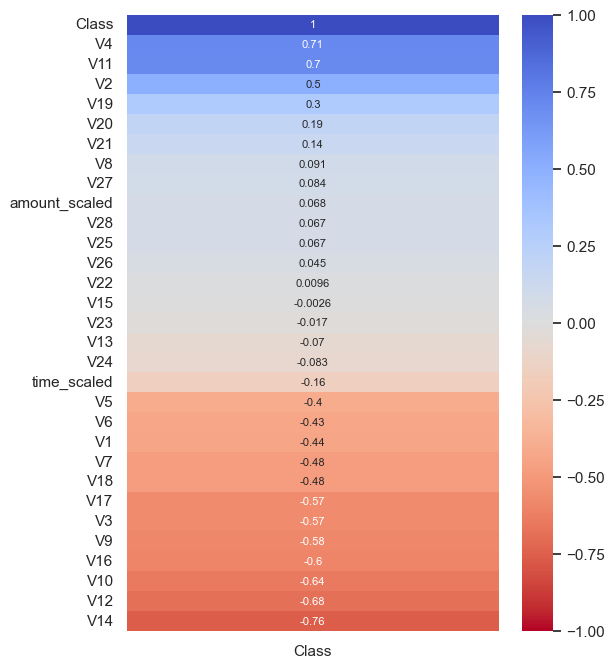

In [ ]:
sm_train_df = pd.concat([Xsm_train, ysm_train], axis=1, join='inner')
sns.set(font_scale=0.6)
sns.set (rc = {'figure.figsize':(6, 8)})
sns.heatmap(sm_train_df.corr()[['Class']].sort_values(by='Class', ascending=False),vmin=-1, vmax=1, annot=True, annot_kws={'size': 8}, cmap='coolwarm_r')
plt.show()

A korreláció nagyon hasonló, a top 3 és alsó 4 változatlan, kicsit eltérő számokkal, de nem jelentősen.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

logreg_sm = LogisticRegression(penalty="l2",C=1)
dectree_sm = DecisionTreeClassifier()
svc_sm = SVC(C=0.7,kernel="linear")
knear_sm = KNeighborsClassifier()







In [ ]:
logreg_sm.fit(Xsm_train, ysm_train)
#dectree_sm.fit(Xsm_train,ysm_train)
svc_sm.fit(Xsm_train,ysm_train)
#knear_sm.fit(Xsm_train,ysm_train)

SVC()

In [ ]:
logreg_sm_file = "logreg_sm_model.pkl"
joblib.dump(logreg_sm,logreg_sm_file)

In [ ]:
svc_sm_file = "svc_sm_model.pkl"
joblib.dump(svc_sm,svc_sm_file)

In [ ]:
logreg_sm = joblib.load(logreg_sm_file)
svc_sm = joblib.load(svc_sm_file)

In [ ]:
logreg_pred = logreg_sm.predict(Xsm_test)
#dectree_pred = dectree_sm.predict(Xsm_test)
svc_pred = svc_sm.predict(Xsm_test)
#knear_pred = knear_sm.predict(Xsm_test)

In [ ]:


print("A logisztikus regresszió modellünk pontossági pontszáma jelenleg: ",accuracy_score(ysm_test, logreg_pred))
#print("A Döntési fa modellünk pontossági pontszáma jelenleg: ",accuracy_score(ysm_test, dectree_pred))
print("A Support Vector Machine modellünk pontossági pontszáma jelenleg: ",accuracy_score(ysm_test, svc_pred))
#LŁprint("A K közelebbi szomszéd modellünk pontossági pontszáma jelenleg: ",accuracy_score(ysm_test, knear_pred))

A logisztikus regresszió modellünk pontossági pontszáma jelenleg:  0.9376340871522527
A Support Vector Machine modellünk pontossági pontszáma jelenleg:  0.9503569795659973


Így első ránézésre úgy néz ki, hogy a logisztikus regressziót és a Support Vector machinet nem érintette komolyabban a SMOTE adathalmaz, sőt az SVM még jobb is lett 2 % ponttal, mint a Random Undersampling során. Azonban a döntési fa és a K közelebbi szomszéd már rosszabbul kezelték a hirtelen megnövekedett adathalmazt, pontatlanabbak lettek. Nézzük meg, hogy a hiperparaméter tuning után milyen eredményeket kapunk.

In [ ]:
from sklearn.model_selection import GridSearchCV


# Logisztikus Regresszió 
#log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

#grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
#grid_log_reg.fit(Xsm_train, ysm_train)
#print(grid_log_reg.best_params_)
# Logisztikus regresszió legjobb beállítások
#logreg_sm = grid_log_reg.best_estimator_

{'C': 100, 'penalty': 'l2'}


In [ ]:
# Support Vector Machine
#svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
#grid_svc = GridSearchCV(SVC(), svc_params)
#grid_svc.fit(Xsm_train, ysm_train)
#print(grid_svc.best_params_)

# SVC legjobb beállítások
#svc_sm = grid_svc.best_estimator_


In [ ]:
logreg_pred = logreg_sm.predict(Xsm_test)
svc_pred = svc_sm.predict(Xsm_test)
print("A logisztikus regresszió modellünk pontossági pontszáma jelenleg: ",accuracy_score(ysm_test, logreg_pred))
print("A Support Vector Machine modellünk pontossági pontszáma jelenleg: ",accuracy_score(ysm_test, svc_pred))

Classification report:

In [ ]:
print("Logreg: ")
print(classification_report(ysm_test,logreg_pred))
print("SVC: ")
print(classification_report(ysm_test,svc_pred))

Roc-AUC score:

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

logreg_pred = logreg_sm.decision_function(Xsm_test)
svc_pred = svc_sm.decision_function(Xsm_test)

print('Logistic Regression: ', roc_auc_score(ysm_test, logreg_pred))
print('Support Vector Classifier: ', roc_auc_score(ysm_test, svc_pred))

In [ ]:
log_fpr, log_tpr, log_thresold = roc_curve(ysm_test, logreg_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(ysm_test, svc_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, svc_fpr, svc_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC görbe', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logisztikus Regresszió ROC-AUC pontszáma: {:.4f}'.format(roc_auc_score(ysm_test, logreg_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector ROC-AUC pontszáma: {:.4f}'.format(roc_auc_score(ysm_test, svc_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)
   
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, svc_fpr, svc_tpr)
plt.show()

confusion matrix: kiegyenlített SMOTE

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_logreg = logreg_sm.predict(Xsm_test)
y_pred_svc = svc_sm.predict(X_test)


log_reg_cf = confusion_matrix(ysm_test, y_pred_logreg)
svc_cf = confusion_matrix(ysm_test, y_pred_svc)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,6))

sns.heatmap(log_reg_cf, ax=ax1, annot=True,fmt='g', cmap=plt.cm.copper)
ax1.set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax1.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax1.set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax2, annot=True,fmt='g', cmap=plt.cm.copper)
ax2.set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax2.set_xticklabels(['', ''], fontsize=14, rotation=90)
ax2.set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

végső teszt:

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred_logreg_original = logreg_sm.predict(X)
y_pred_svc_original = svc_sm.predict(X)


log_reg_cf = confusion_matrix(y, y_pred_logreg_original)
svc_cf = confusion_matrix(y, y_pred_svc_original)

print(log_reg_cf)
print(svc_cf)

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,6))

sns.heatmap(log_reg_cf, ax=ax1,vmin=0, vmax=26000, annot=True, fmt='g')
ax1.set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax1.set_xticklabels(['', ''], fontsize=8, rotation=90)
ax1.set_yticklabels(['', ''], fontsize=8, rotation=360)

sns.heatmap(svc_cf, ax=ax2,vmin=0,vmax=26000, annot=True, fmt='g')
ax2.set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax2.set_xticklabels(['', ''], fontsize=8, rotation=90)
ax2.set_yticklabels(['', ''], fontsize=8, rotation=360)

plt.show()

In [ ]:
print(classification_report(y,y_pred_logreg_original))
print(classification_report(y,y_pred_svc_original))